### A coding scheme for Simon game sequences

#### **Author:** Sol Markman (smarkman@mit.edu)

Assumption: This scheme is hierarchical, so that different chunk types take priority over others. For example, repeats of a single color are chunked first, then repeats of multiple colors, then nested repeats, and then alternations are chunked with the remaining items, etc.
- RRRGRGRG is compressed to [R]^3 [GR]^2 G, size=6
- RRRGRG is compressed to [R]^3 [GRG], size=4

#### Types of chunks/compression and their sizes:

#### 1) Repeats
Size = (size of subsequence) + 1. This assumes that size does not increase with the number of repeats, and 
repeats are only beneficial for size>2.

a) Single color repeats
- RRRR is compressed to [R]^4, size=2

b) Multicolor repeats
- RGRGRG is compressed to [RG]^3, size=3
    
c) Nested repeats
- RRRGGGRRRGGG is compressed to [ [R]^3 [G]^3 ]^2, size=5

#### 2) Alternations
Not yet implemented

#### 3) Cycles
Not yet implemented

#### 4) Exposure compression (within a sequence)
Not yet implemented


In [1]:
from common_methods import *

In [2]:
# Testing hyp1 code
test_sequences = ['BBBRRRYYYGGG', 'RRRZGZRRR', 'BBBBGRY', 'RRRYGYGYG', 'GBGBB', 
                    'BBBBBBBrrrBBBBBB', 'GGGGGGGG', 'ABCD', 'BGGGR', 'abbabbabba']
answers = [8, 7, 5, 8, 5, 6, 2, 4, 4, 10]
    
test_coding_scheme(simple_repeat_scheme, test_sequences, answers)

BBBRRRYYYGGG 8
(8, '[B]3[R]3[Y]3[G]3')
RRRZGZRRR 7
(7, '[R]3ZGZ[R]3')
BBBBGRY 5
(5, '[B]4GRY')
RRRYGYGYG 8
(8, '[R]3YGYGYG')
GBGBB 5
(5, 'GBG[B]2')
BBBBBBBrrrBBBBBB 6
(6, '[B]7[r]3[B]6')
GGGGGGGG 2
(2, '[G]8')
ABCD 4
(4, 'ABCD')
BGGGR 4
(4, 'B[G]3R')
abbabbabba 10
(10, 'a[b]2a[b]2a[b]2a')


In [3]:
# Testing hyp3 code
test_sequences = ['BBBRRRYYYGGG', 'RRRZGZRRR', 'BBBBGRY', 'RRRYGYGYG', 'GBGBB', 
                'BBBBBBBrrrBBBBBB', 'GRGRGRZDZDZDZTTTTTTTGGG', 'ababcdcdababcdcd',
                'abbabbabba', 'abcabcabc', 'abbccccabbccccabbcccc', 'bbbbaaaabbbbaaaa',
                'bbbaaabbbaaa', 'bbaabbaa', 'baba', 'bbaabbaab']
answers = [8, 7, 5, 5, 5, 6, 11, 7, 5, 4, 6, 5, 5, 5, 3, 6]

test_coding_scheme(complex_repeat_scheme, test_sequences, answers)

BBBRRRYYYGGG 8
(8, '[B]3[R]3[Y]3[G]3')
RRRZGZRRR 7
(7, '[R]3ZGZ[R]3')
BBBBGRY 5
(5, '[B]4GRY')
RRRYGYGYG 5
(5, '[R]3[YG]3')
GBGBB 5
(5, 'GBG[B]2')
BBBBBBBrrrBBBBBB 6
(6, '[B]7[r]3[B]6')
GRGRGRZDZDZDZTTTTTTTGGG 11
(11, '[GR]3[ZD]3Z[T]7[G]3')
ababcdcdababcdcd 7
(7, '[[ab]2[cd]2]2')
abbabbabba 5
(5, '[a[b]2]3a')
abcabcabc 4
(4, '[abc]3')
abbccccabbccccabbcccc 6
(6, '[a[b]2[c]4]3')
bbbbaaaabbbbaaaa 5
(5, '[[b]4[a]4]2')
bbbaaabbbaaa 5
(5, '[[b]3[a]3]2')
bbaabbaa 5
(5, '[[b]2[a]2]2')
baba 3
(3, '[ba]2')
bbaabbaab 6
(6, '[[b]2[a]2]2b')


In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
# Analyze data within one subject

def get_chunkability_simple(scheme, seq):

    l = scheme(seq)[0]
    chunkability = 1 - l/len(seq)
    return chunkability

def get_chunkability_percentile(scheme, seq, n_samples=1000):

    cl_samples = sample_compressed_lengths(scheme, len(seq), n_samples)
    cl_datapt = scheme(seq)[0]
    cl_percentile = stats.percentileofscore(cl_samples, cl_datapt)
    chunkability = -(cl_percentile - 50) # should positive if the compression length less than the median

    return chunkability

def get_chunkabilities_from_logs(data_path, get_chunkability=get_chunkability_simple):
    session_data = parse_simons_game_logs(data_path)

    N_games = 0
    scores = []
    sequences = []

    for i, key in enumerate(session_data.keys()):
        N_games += len(session_data[key])
        for game in session_data[key].values():
            sequences.append(game['longest_sequence'])
            scores.append(len(game['longest_sequence']))

    print('Games: ', N_games)
    print('Scores: ', scores)
    print('Sequences: ', sequences)

    # Compute chunkabilities for each sequence
    chunk1 = []
    chunk2 = []
    chunk3 = []
    for seq in sequences:

        c1 = get_chunkability(simple_repeat_scheme, seq)
        c2 = get_chunkability(LZ_scheme, seq)
        c3 = get_chunkability(complex_repeat_scheme, seq)

        chunk1.append(c1)
        chunk2.append(c2)
        chunk3.append(c3)
    
    return scores, sequences, chunk1, chunk2, chunk3

Games:  31
Scores:  [10, 12, 9, 10, 9, 5, 6, 13, 5, 10, 10, 11, 8, 8, 12, 7, 8, 5, 8, 13, 5, 11, 14, 7, 15, 9, 13, 9, 11, 5, 10]
Sequences:  ['BBYYRRRBGR', 'GBYBGGBYBBBB', 'YGGYRGBYB', 'YRRGGGRBGY', 'RGGBGRRRY', 'GYRBY', 'GRBBYR', 'RGRRYBYGYYBYB', 'YBRYG', 'RYBRRBRRRR', 'GYYRRRGYRG', 'GYYBBGBGGYR', 'YGRYGBBG', 'YBGRYRBY', 'GBBRGGBYRYBR', 'YRRBBRG', 'GGYBYRRG', 'GBRGG', 'YGRGRBRB', 'RYRYRYRRBBYYB', 'BBRYR', 'YGYYBYBRBYG', 'GRYBGRYBRRBYGY', 'YRBBYBR', 'YGGGBBBRBRBBBYY', 'YRBYYBBBB', 'GGGRGRGGGYBRR', 'RRYRYGGYB', 'BRRRYRGBBGR', 'GRRBR', 'YGBGYGBRGY']
Hyp:   slope,   intercept,   r-value,   p-value,   std_err
Hyp1:  2.2620907639073726 -19.826843225978177 0.2647060127132363 0.1501303586605779 1.5302857011851265
Hyp3:  4.058969922810754 -36.95268831514508 0.4391340497078048 0.013453674816055822 1.5420550689957393


Text(0.5, 0.98, 'For logs in ./Sol_logs/Random')

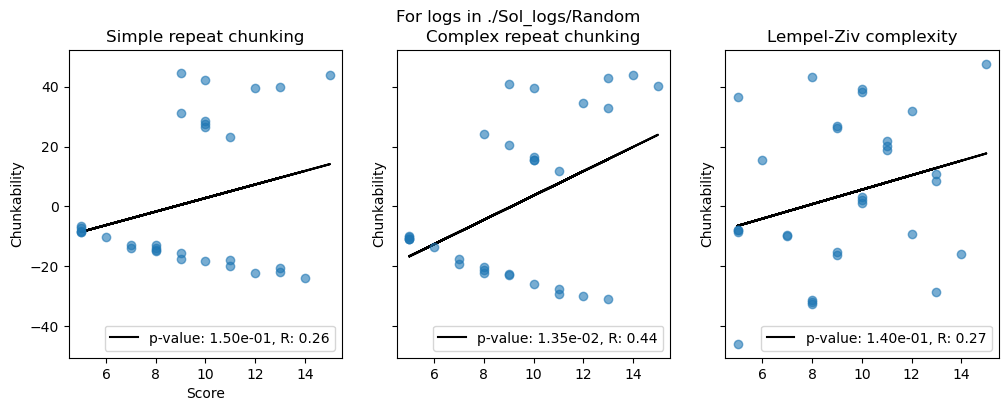

In [13]:
data_path = './Sol_logs/Random' # './Hokyung_logs' # './Quilee_logs' # './Jack_logs' # 
scores, sequences, chunk1, chunk2, chunk3 = get_chunkabilities_from_logs(data_path, get_chunkability=get_chunkability_percentile)

m1, b1, r1, p1, std_err1 = stats.linregress(scores, chunk1)
m2, b2, r2, p2, std_err2 = stats.linregress(scores, chunk2)
m3, b3, r3, p3, std_err3 = stats.linregress(scores, chunk3)

print('Hyp:   slope,   intercept,   r-value,   p-value,   std_err')
print('Hyp1: ', m1, b1, r1, p1, std_err1)
print('Hyp3: ', m3, b3, r3, p3, std_err3)

fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharex=False, sharey=True)
ax[0].scatter(scores, chunk1, alpha=0.6)
ax[1].scatter(scores, chunk3, alpha=0.6)
ax[2].scatter(scores, chunk2, alpha=0.6)
ax[0].set(ylabel='Chunkability', xlabel='Score', title='Simple repeat chunking')
ax[1].set(ylabel='Chunkability', title='Complex repeat chunking')
ax[2].set(ylabel='Chunkability', title='Lempel-Ziv complexity')
ax[0].plot(np.array(scores), m1*np.array(scores) + b1, color='k', zorder=0, 
           label=f'p-value: {p1:.2e}, R: {r1:.2f}')
ax[1].plot(np.array(scores), m3*np.array(scores) + b3, color='k', zorder=0, 
           label=f'p-value: {p3:.2e}, R: {r3:.2f}')
ax[2].plot(np.array(scores), m2*np.array(scores) + b2, color='k', zorder=0,
              label=f'p-value: {p2:.2e}, R: {r2:.2f}')
ax[0].legend(loc='lower right')
ax[1].legend(loc='lower right')
ax[2].legend(loc='lower right')
fig.suptitle(f'For logs in {data_path}')

Text(0.5, 0.98, 'Simulated random data')

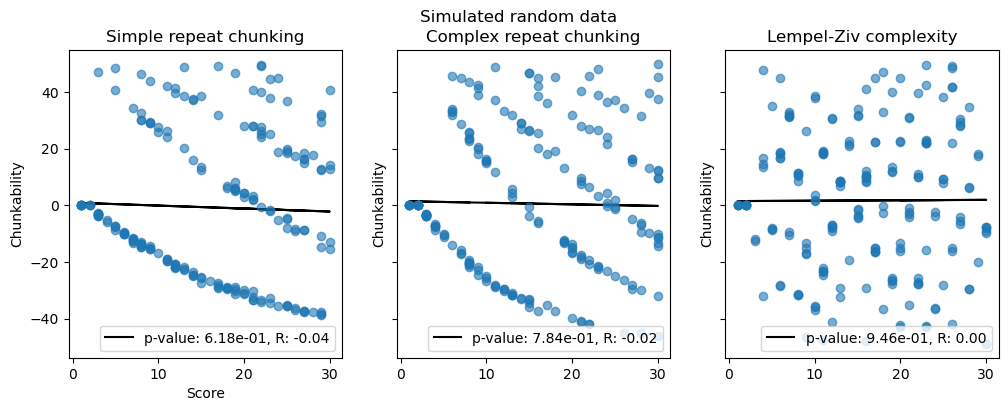

In [10]:
# Check that randomly simulated data yields no correlation

def simulate_random_percentiles(scheme, max_len=30, n_datapts=200, n_samples=1000):
    random_sequences = sample_random_sequences(max_len, n_datapts, max=True)
    lengths = []
    chunk_ps = []
    for i in range(n_datapts):
        seq = random_sequences[i]
        lengths.append(len(seq))
        chunk_ps.append(get_chunkability_percentile(scheme, seq, n_samples))
        
    return lengths, chunk_ps

l1, c1 = simulate_random_percentiles(simple_repeat_scheme)
l2, c2 = simulate_random_percentiles(LZ_scheme)
l3, c3 = simulate_random_percentiles(complex_repeat_scheme)

m1, b1, r1, p1, std_err1 = stats.linregress(l1, c1)
m2, b2, r2, p2, std_err2 = stats.linregress(l2, c2)
m3, b3, r3, p3, std_err3 = stats.linregress(l3, c3)

fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharex=False, sharey=True)
ax[0].scatter(l1, c1, alpha=0.6)
ax[1].scatter(l3, c3, alpha=0.6)
ax[2].scatter(l2, c2, alpha=0.6)
ax[0].set(ylabel='Chunkability', xlabel='Score', title='Simple repeat chunking')
ax[1].set(ylabel='Chunkability', title='Complex repeat chunking')
ax[2].set(ylabel='Chunkability', title='Lempel-Ziv complexity')
ax[0].plot(np.array(l1), m1*np.array(l1) + b1, color='k', zorder=0, 
           label=f'p-value: {p1:.2e}, R: {r1:.2f}')
ax[1].plot(np.array(l3), m3*np.array(l3) + b3, color='k', zorder=0, 
           label=f'p-value: {p3:.2e}, R: {r3:.2f}')
ax[2].plot(np.array(l2), m2*np.array(l2) + b2, color='k', zorder=0,
              label=f'p-value: {p2:.2e}, R: {r2:.2f}')
ax[0].legend(loc='lower right')
ax[1].legend(loc='lower right')
ax[2].legend(loc='lower right')
fig.suptitle(f'Simulated random data')

Text(0, 0.5, 'Chunkability')

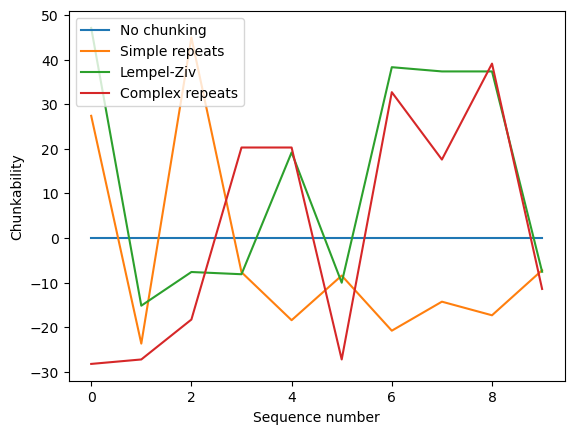

In [8]:
n = 10
np.random.seed(18)
plt.plot(np.arange(n), np.zeros(n), label='No chunking')
plt.plot(np.arange(n), np.random.choice(chunk1, n), label='Simple repeats')
plt.plot(np.arange(n), np.random.choice(chunk2, n), label='Lempel-Ziv')
plt.plot(np.arange(n), np.random.choice(chunk3, n), label='Complex repeats')
plt.legend()
plt.xlabel('Sequence number')
plt.ylabel('Chunkability')

